Epizod 0/10000, epsilon: 1.000, ostatnia nagroda: -1000.00
Epizod 1000/10000, epsilon: 0.606, ostatnia nagroda: -447.00
Epizod 2000/10000, epsilon: 0.368, ostatnia nagroda: -429.00
Epizod 3000/10000, epsilon: 0.223, ostatnia nagroda: -327.00
Epizod 4000/10000, epsilon: 0.135, ostatnia nagroda: -194.00
Epizod 5000/10000, epsilon: 0.082, ostatnia nagroda: -219.00
Epizod 6000/10000, epsilon: 0.050, ostatnia nagroda: -257.00
Epizod 7000/10000, epsilon: 0.030, ostatnia nagroda: -323.00
Epizod 8000/10000, epsilon: 0.018, ostatnia nagroda: -285.00
Epizod 9000/10000, epsilon: 0.011, ostatnia nagroda: -326.00


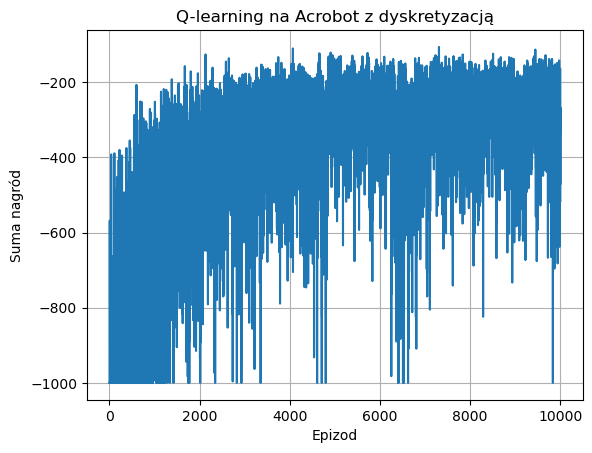

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Tworzymy środowisko Acrobot
env = gym.make("Acrobot-v1")
#env = gym.make("Acrobot-v1", render_mode="human")

# Parametry Q-learningu
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0
epsilon_min = 0.01 # Zmniejszono epsilon_min
epsilon_decay = 0.9995 # Zwiększono tempo zmniejszania epsilona
episodes = 10000 # Zwiększono liczbę epizodów
max_steps = 1000

# Rozmiar siatki
NUM_BINS = 10 # Zwiększono liczbę binów

# Zakresy obserwacji (dokładne zakresy z dokumentacji Acrobot-v1)
obs_space_low = np.array([-1.0, -1.0, -1.0, -1.0, -12.57, -28.27])
obs_space_high = np.array([1.0, 1.0, 1.0, 1.0, 12.57, 28.27])

# Tworzymy siatkę binów
bins = [np.linspace(obs_space_low[i], obs_space_high[i], NUM_BINS - 1) for i in range(len(obs_space_high))]

# Funkcja do dyskretyzacji
def discretize(obs):
    return tuple(np.digitize(obs[i], bins[i]) for i in range(len(obs)))

# Q-tablica
action_size = env.action_space.n
q_shape = [NUM_BINS] * len(obs_space_high) + [action_size]
Q = np.zeros(q_shape)

# Do śledzenia nagród
rewards = []

for episode in range(episodes):
    obs, _ = env.reset()
    state = discretize(obs)
    total_reward = 0

    for step in range(max_steps):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_obs, reward, done, truncated, _ = env.step(action)
        next_state = discretize(next_obs)

        best_next_action = np.argmax(Q[next_state])
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        Q[state][action] += learning_rate * (td_target - Q[state][action])

        state = next_state
        total_reward += reward

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)

    if episode % 1000 == 0:
        print(f"Epizod {episode}/{episodes}, epsilon: {epsilon:.3f}, ostatnia nagroda: {rewards[-1]:.2f}")

# Wykres
plt.plot(rewards)
plt.xlabel("Epizod")
plt.ylabel("Suma nagród")
plt.title("Q-learning na Acrobot z dyskretyzacją")
plt.grid(True)
plt.show()

Epizod 0/5000 zakończony.
Epizod 100/5000 zakończony.
Epizod 200/5000 zakończony.
Epizod 300/5000 zakończony.
Epizod 400/5000 zakończony.
Epizod 500/5000 zakończony.
Epizod 600/5000 zakończony.
Epizod 700/5000 zakończony.
Epizod 800/5000 zakończony.
Epizod 900/5000 zakończony.
Epizod 1000/5000 zakończony.
Epizod 1100/5000 zakończony.
Epizod 1200/5000 zakończony.
Epizod 1300/5000 zakończony.
Epizod 1400/5000 zakończony.
Epizod 1500/5000 zakończony.
Epizod 1600/5000 zakończony.
Epizod 1700/5000 zakończony.
Epizod 1800/5000 zakończony.
Epizod 1900/5000 zakończony.
Epizod 2000/5000 zakończony.
Epizod 2100/5000 zakończony.
Epizod 2200/5000 zakończony.
Epizod 2300/5000 zakończony.
Epizod 2400/5000 zakończony.
Epizod 2500/5000 zakończony.
Epizod 2600/5000 zakończony.
Epizod 2700/5000 zakończony.
Epizod 2800/5000 zakończony.
Epizod 2900/5000 zakończony.
Epizod 3000/5000 zakończony.
Epizod 3100/5000 zakończony.
Epizod 3200/5000 zakończony.
Epizod 3300/5000 zakończony.
Epizod 3400/5000 zakończon

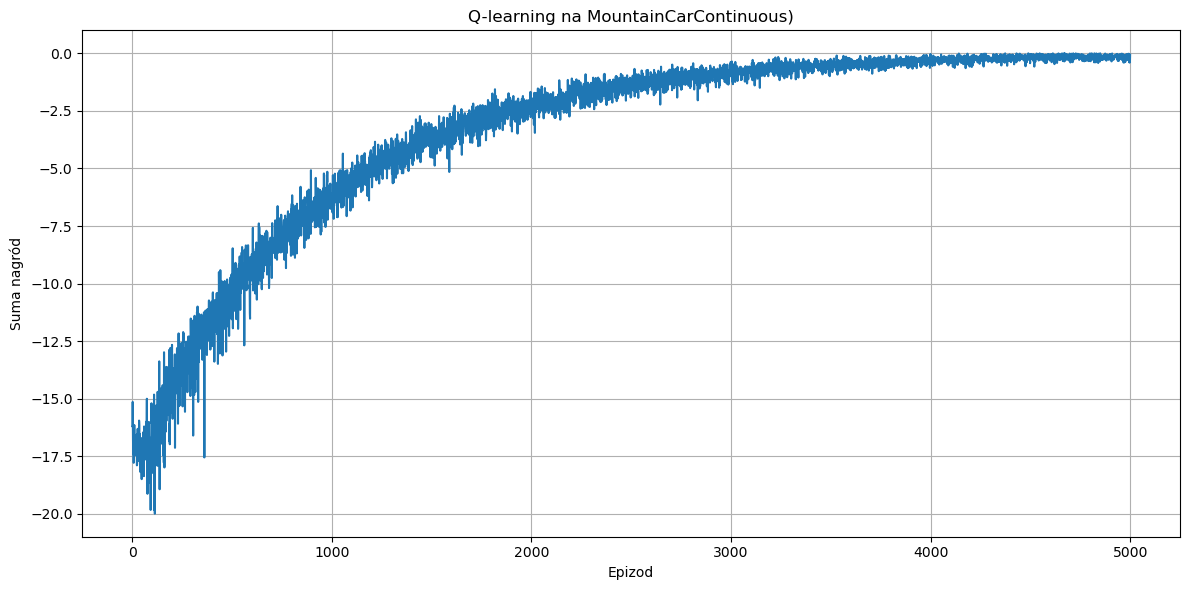

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCarContinuous-v0")

learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999
episodes = 5000
max_steps = 500

NUM_STATE_BINS = 20

position_min = -1.2
position_max = 0.6
velocity_min = -0.07
velocity_max = 0.07

position_bins = np.linspace(position_min, position_max, NUM_STATE_BINS - 1)
velocity_bins = np.linspace(velocity_min, velocity_max, NUM_STATE_BINS - 1)

def discretize_state(obs):
    position, velocity = obs
    position_bin = np.digitize(position, position_bins)
    velocity_bin = np.digitize(velocity, velocity_bins)
    return (position_bin, velocity_bin)

NUM_ACTION_BINS = 3 
action_space = np.linspace(-1.0, 1.0, NUM_ACTION_BINS)

def discretize_action(action):
    return np.digitize(action[0], action_space) - 1

def undiscritize_action(discrete_action):
    return np.array([action_space[discrete_action]])

state_size = (NUM_STATE_BINS + 1, NUM_STATE_BINS + 1)
action_size = NUM_ACTION_BINS
Q = np.zeros(state_size + (action_size,))

rewards = []
epsilon_history = []

for episode in range(episodes):
    obs, _ = env.reset()
    state = discretize_state(obs)
    total_reward = 0

    for step in range(max_steps):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
            discrete_action = discretize_action(action)
        else:
            discrete_action = np.argmax(Q[state])
            action = undiscritize_action(discrete_action)

        next_obs, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_obs)

        best_next_action = np.argmax(Q[next_state])
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        Q[state][discrete_action] += learning_rate * (td_target - Q[state][discrete_action])

        state = next_state
        total_reward += reward

        if done or truncated:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)
    epsilon_history.append(epsilon)


plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(rewards)
plt.xlabel("Epizod")
plt.ylabel("Suma nagród")
plt.title("Q-learning na MountainCarContinuous)")
plt.grid(True)

plt.tight_layout()
plt.show()

env.close()

Epizod 0/5000 zakończony.
Epizod 100/5000 zakończony.
Epizod 200/5000 zakończony.
Epizod 300/5000 zakończony.
Epizod 400/5000 zakończony.
Epizod 500/5000 zakończony.
Epizod 600/5000 zakończony.
Epizod 700/5000 zakończony.
Epizod 800/5000 zakończony.
Epizod 900/5000 zakończony.
Epizod 1000/5000 zakończony.
Epizod 1100/5000 zakończony.
Epizod 1200/5000 zakończony.
Epizod 1300/5000 zakończony.
Epizod 1400/5000 zakończony.
Epizod 1500/5000 zakończony.
Epizod 1600/5000 zakończony.
Epizod 1700/5000 zakończony.
Epizod 1800/5000 zakończony.
Epizod 1900/5000 zakończony.
Epizod 2000/5000 zakończony.
Epizod 2100/5000 zakończony.
Epizod 2200/5000 zakończony.
Epizod 2300/5000 zakończony.
Epizod 2400/5000 zakończony.
Epizod 2500/5000 zakończony.
Epizod 2600/5000 zakończony.
Epizod 2700/5000 zakończony.
Epizod 2800/5000 zakończony.
Epizod 2900/5000 zakończony.
Epizod 3000/5000 zakończony.
Epizod 3100/5000 zakończony.
Epizod 3200/5000 zakończony.
Epizod 3300/5000 zakończony.
Epizod 3400/5000 zakończon

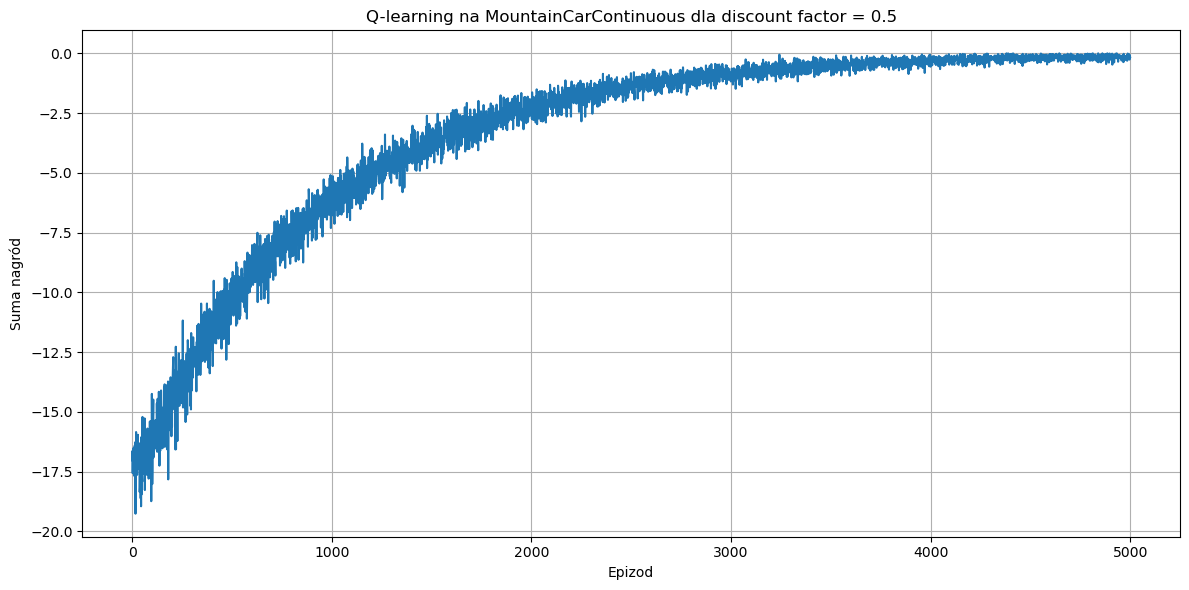

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCarContinuous-v0")

learning_rate = 0.1
discount_factor = 0.5
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999
episodes = 5000
max_steps = 500

NUM_STATE_BINS = 20

position_min = -1.2
position_max = 0.6
velocity_min = -0.07
velocity_max = 0.07

position_bins = np.linspace(position_min, position_max, NUM_STATE_BINS - 1)
velocity_bins = np.linspace(velocity_min, velocity_max, NUM_STATE_BINS - 1)

def discretize_state(obs):
    position, velocity = obs
    position_bin = np.digitize(position, position_bins)
    velocity_bin = np.digitize(velocity, velocity_bins)
    return (position_bin, velocity_bin)

NUM_ACTION_BINS = 3 
action_space = np.linspace(-1.0, 1.0, NUM_ACTION_BINS)

def discretize_action(action):
    return np.digitize(action[0], action_space) - 1

def undiscritize_action(discrete_action):
    return np.array([action_space[discrete_action]])

state_size = (NUM_STATE_BINS + 1, NUM_STATE_BINS + 1) 
action_size = NUM_ACTION_BINS
Q = np.zeros(state_size + (action_size,))

rewards = []
epsilon_history = []

for episode in range(episodes):
    obs, _ = env.reset()
    state = discretize_state(obs)
    total_reward = 0

    for step in range(max_steps):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
            discrete_action = discretize_action(action)
        else:
            discrete_action = np.argmax(Q[state])
            action = undiscritize_action(discrete_action)

        next_obs, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_obs)

        best_next_action = np.argmax(Q[next_state])
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        Q[state][discrete_action] += learning_rate * (td_target - Q[state][discrete_action])

        state = next_state
        total_reward += reward

        if done or truncated:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)
    epsilon_history.append(epsilon)

    if episode % 100 == 0:
        print(f"Epizod {episode}/{episodes} zakończony.")

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(rewards)
plt.xlabel("Epizod")
plt.ylabel("Suma nagród")
plt.title("Q-learning na MountainCarContinuous dla discount factor = 0.5")
plt.grid(True)

plt.tight_layout()
plt.show()

env.close()

Epizod 0/5000 zakończony.
Epizod 100/5000 zakończony.
Epizod 200/5000 zakończony.
Epizod 300/5000 zakończony.
Epizod 400/5000 zakończony.
Epizod 500/5000 zakończony.
Epizod 600/5000 zakończony.
Epizod 700/5000 zakończony.
Epizod 800/5000 zakończony.
Epizod 900/5000 zakończony.
Epizod 1000/5000 zakończony.
Epizod 1100/5000 zakończony.
Epizod 1200/5000 zakończony.
Epizod 1300/5000 zakończony.
Epizod 1400/5000 zakończony.
Epizod 1500/5000 zakończony.
Epizod 1600/5000 zakończony.
Epizod 1700/5000 zakończony.
Epizod 1800/5000 zakończony.
Epizod 1900/5000 zakończony.
Epizod 2000/5000 zakończony.
Epizod 2100/5000 zakończony.
Epizod 2200/5000 zakończony.
Epizod 2300/5000 zakończony.
Epizod 2400/5000 zakończony.
Epizod 2500/5000 zakończony.
Epizod 2600/5000 zakończony.
Epizod 2700/5000 zakończony.
Epizod 2800/5000 zakończony.
Epizod 2900/5000 zakończony.
Epizod 3000/5000 zakończony.
Epizod 3100/5000 zakończony.
Epizod 3200/5000 zakończony.
Epizod 3300/5000 zakończony.
Epizod 3400/5000 zakończon

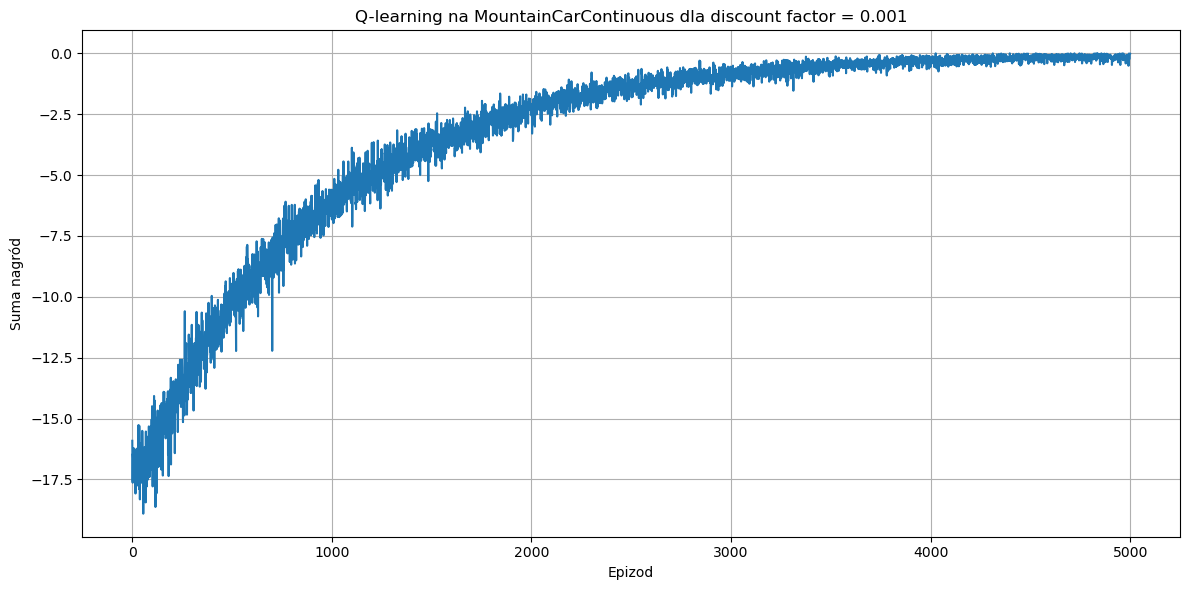

In [14]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCarContinuous-v0")

learning_rate = 0.1
discount_factor = 0.001
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999
episodes = 5000
max_steps = 500

NUM_STATE_BINS = 20

position_min = -1.2
position_max = 0.6
velocity_min = -0.07
velocity_max = 0.07

position_bins = np.linspace(position_min, position_max, NUM_STATE_BINS - 1)
velocity_bins = np.linspace(velocity_min, velocity_max, NUM_STATE_BINS - 1)

def discretize_state(obs):
    position, velocity = obs
    position_bin = np.digitize(position, position_bins)
    velocity_bin = np.digitize(velocity, velocity_bins)
    return (position_bin, velocity_bin)

NUM_ACTION_BINS = 3 
action_space = np.linspace(-1.0, 1.0, NUM_ACTION_BINS)

def discretize_action(action):
    return np.digitize(action[0], action_space) - 1

def undiscritize_action(discrete_action):
    return np.array([action_space[discrete_action]])

state_size = (NUM_STATE_BINS + 1, NUM_STATE_BINS + 1) 
action_size = NUM_ACTION_BINS
Q = np.zeros(state_size + (action_size,))

rewards = []
epsilon_history = []

for episode in range(episodes):
    obs, _ = env.reset()
    state = discretize_state(obs)
    total_reward = 0

    for step in range(max_steps):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
            discrete_action = discretize_action(action)
        else:
            discrete_action = np.argmax(Q[state])
            action = undiscritize_action(discrete_action)

        next_obs, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_obs)

        best_next_action = np.argmax(Q[next_state])
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        Q[state][discrete_action] += learning_rate * (td_target - Q[state][discrete_action])

        state = next_state
        total_reward += reward

        if done or truncated:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)
    epsilon_history.append(epsilon)

    if episode % 100 == 0:
        print(f"Epizod {episode}/{episodes} zakończony.")

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(rewards)
plt.xlabel("Epizod")
plt.ylabel("Suma nagród")
plt.title("Q-learning na MountainCarContinuous dla discount factor = 0.001")
plt.grid(True)

plt.tight_layout()
plt.show()

env.close()

Epizod 0/5000 zakończony.
Epizod 100/5000 zakończony.
Epizod 200/5000 zakończony.
Epizod 300/5000 zakończony.
Epizod 400/5000 zakończony.
Epizod 500/5000 zakończony.
Epizod 600/5000 zakończony.
Epizod 700/5000 zakończony.
Epizod 800/5000 zakończony.
Epizod 900/5000 zakończony.
Epizod 1000/5000 zakończony.
Epizod 1100/5000 zakończony.
Epizod 1200/5000 zakończony.
Epizod 1300/5000 zakończony.
Epizod 1400/5000 zakończony.
Epizod 1500/5000 zakończony.
Epizod 1600/5000 zakończony.
Epizod 1700/5000 zakończony.
Epizod 1800/5000 zakończony.
Epizod 1900/5000 zakończony.
Epizod 2000/5000 zakończony.
Epizod 2100/5000 zakończony.
Epizod 2200/5000 zakończony.
Epizod 2300/5000 zakończony.
Epizod 2400/5000 zakończony.
Epizod 2500/5000 zakończony.
Epizod 2600/5000 zakończony.
Epizod 2700/5000 zakończony.
Epizod 2800/5000 zakończony.
Epizod 2900/5000 zakończony.
Epizod 3000/5000 zakończony.
Epizod 3100/5000 zakończony.
Epizod 3200/5000 zakończony.
Epizod 3300/5000 zakończony.
Epizod 3400/5000 zakończon

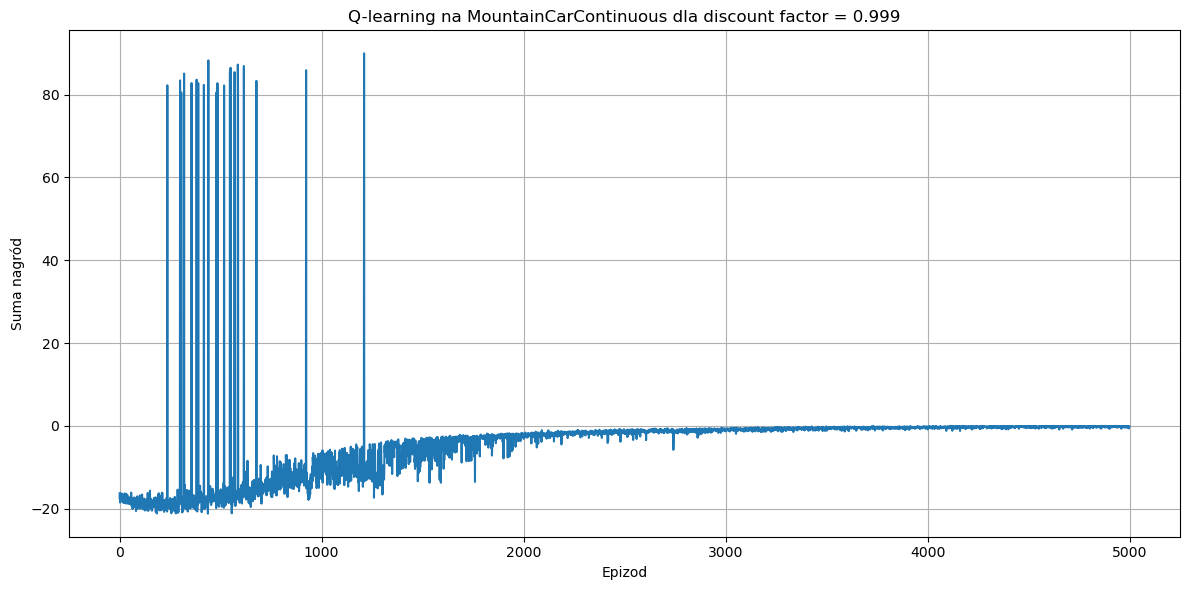

In [18]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCarContinuous-v0")

learning_rate = 0.1
discount_factor = 0.999
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999
episodes = 5000
max_steps = 500

NUM_STATE_BINS = 20

position_min = -1.2
position_max = 0.6
velocity_min = -0.07
velocity_max = 0.07

position_bins = np.linspace(position_min, position_max, NUM_STATE_BINS - 1)
velocity_bins = np.linspace(velocity_min, velocity_max, NUM_STATE_BINS - 1)

def discretize_state(obs):
    position, velocity = obs
    position_bin = np.digitize(position, position_bins)
    velocity_bin = np.digitize(velocity, velocity_bins)
    return (position_bin, velocity_bin)

NUM_ACTION_BINS = 3 
action_space = np.linspace(-1.0, 1.0, NUM_ACTION_BINS)

def discretize_action(action):
    return np.digitize(action[0], action_space) - 1

def undiscritize_action(discrete_action):
    return np.array([action_space[discrete_action]])

state_size = (NUM_STATE_BINS + 1, NUM_STATE_BINS + 1) 
action_size = NUM_ACTION_BINS
Q = np.zeros(state_size + (action_size,))

rewards = []
epsilon_history = []

for episode in range(episodes):
    obs, _ = env.reset()
    state = discretize_state(obs)
    total_reward = 0

    for step in range(max_steps):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
            discrete_action = discretize_action(action)
        else:
            discrete_action = np.argmax(Q[state])
            action = undiscritize_action(discrete_action)

        next_obs, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_obs)

        best_next_action = np.argmax(Q[next_state])
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        Q[state][discrete_action] += learning_rate * (td_target - Q[state][discrete_action])

        state = next_state
        total_reward += reward

        if done or truncated:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)
    epsilon_history.append(epsilon)

    if episode % 100 == 0:
        print(f"Epizod {episode}/{episodes} zakończony.")

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(rewards)
plt.xlabel("Epizod")
plt.ylabel("Suma nagród")
plt.title("Q-learning na MountainCarContinuous dla discount factor = 0.999")
plt.grid(True)

plt.tight_layout()
plt.show()

env.close()